Как и любой бизнес, компания «Мегафон» хочет повысить удовлетворённость своих клиентов качеством услуг. Это важная задача для удержания пользователей — как давних, так и недавно привлечённых. Ведь затраты на маркетинг и продвижение не оправдаются, если клиент уйдёт из-за низкого качества связи. Однако в реальном мире ресурсы всегда ограничены, и в единицу времени технический отдел может решить конечное количество задач. 

Чтобы делать это наиболее эффективно, важно определить, какие технические показатели качества связи сильнее всего влияют на удовлетворённость клиентов, и в первую очередь направить ресурсы на работу с ними. Для этого «Мегафон» провёл опрос своих клиентов, предложив им оценить уровень удовлетворённости качеством связи. По каждому клиенту, прошедшему опрос, были собраны технические показатели. 

Подготовьте исследование для компании «Мегафон» и проанализируйте, как зависит (и зависит ли) оценка, которую ставит клиент в опросе, от технических показателей, которые были собраны. 

В ходе опроса компания «Мегафон» предложила своим клиентам оценить уровень удовлетворённости качеством связи по десятибалльной шкале (где 10 — это «отлично», а 1 — «ужасно»). Если клиент оценивал качество связи на 9 или 10 баллов, опрос заканчивался. Если клиент ставил оценку ниже 9, задавался второй вопрос — о причинах неудовлетворённости качеством связи с предоставленными пронумерованными вариантами ответа. Ответ можно было дать в свободном формате или перечислить номера ответов через запятую.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

import random
import scipy.stats as st

import warnings
warnings.filterwarnings("ignore")

In [ ]:
megafon = pd.read_csv('https://www.dropbox.com/s/bxxfzsktw2t366t/megafon_data.csv?dl=1')

## **Предварительный анализ датасета.**

*Вывод первых строк датасета, пропуски в данных, типы данных.*

In [ ]:
display(megafon.head())
print()
display(megafon.info())

,Unnamed: 0,user_id,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
0,0,1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83
1,1,2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425
2,2,3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485
3,3,4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51
4,4,5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 3112 non-null   int64  
 1   user_id                                    3112 non-null   int64  
 2   Q1                                         3110 non-null   object 
 3   Q2                                         1315 non-null   object 
 4   Total Traffic(MB)                          3112 non-null   float64
 5   Downlink Throughput(Kbps)                  3112 non-null   float64
 6   Uplink Throughput(Kbps)                    3112 non-null   float64
 7   Downlink TCP Retransmission Rate(%)        3112 non-null   float64
 8   Video Streaming Download Throughput(Kbps)  3112 non-null   float64
 9   Video Streaming xKB Start Delay(ms)        3112 non-null   int64  
 10  Web Page Download Throu

None

In [ ]:
megafon = megafon.drop('Unnamed: 0', axis = 1)

*Общие данные по колонкам с типом "object" (значения поставленных оценок).*

In [ ]:
megafon.describe(include = np.object)

,Q1,Q2
count,3110,1315
unique,49,51
top,10,3
freq,846,190


*Судя по этим данным, в столбце "Q1" есть ряд некорректных ответов, т.к. возможные варианты находятся в диапозоне от 1 до 10.*

In [ ]:
incorrect_scores = megafon[~megafon['Q1'].isin([str(i) for i in range(1, 11)])].shape[0]
share_of_incorrect_scores = round(incorrect_scores*100 / megafon.shape[0], 2)
print(f'Пользователей с некорректным ответом на первый вопрос: {share_of_incorrect_scores}%')

Пользователей с некорректным ответом на первый вопрос: 1.74%


*Для дальнейшей работы можно удалить некорректные ответы на первый вопрос, а также привести значению к типу "int".*

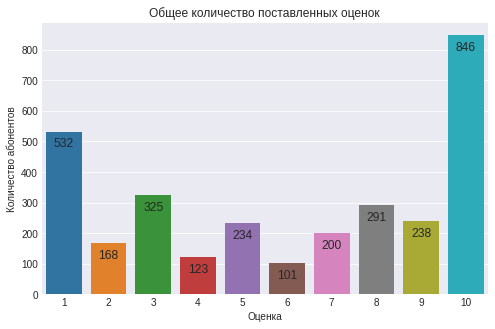

In [ ]:
megafon = megafon[megafon['Q1'].isin([str(i) for i in range(1, 11)])]
megafon['Q1'] = megafon['Q1'].astype(int)

plt.figure(figsize = (8, 5))
scores_number = megafon.groupby('Q1', as_index = False)['user_id'].count().rename(columns = {'user_id': 'Всего оценок'})
sns.barplot(x = 'Q1', y = 'Всего оценок', data = scores_number)
for i, value in enumerate(scores_number['Всего оценок'].to_list()):
  plt.text(i, value-50, value, fontsize = 12, horizontalalignment = 'center')
plt.title('Общее количество поставленных оценок')
plt.xlabel('Оценка')
plt.ylabel('Количество абонентов')
plt.show()

*Чтобы предварительно оценить значения технических показателей, выведем общие статистики, а также дополнительные квантили (2,5% и 97,5%) и коэф-т вариации.*

In [ ]:
upper_quantiles = [megafon[i].quantile(0.975) for i in megafon.columns[3:]]
lower_quantiles = [megafon[i].quantile(0.025) for i in megafon.columns[3:]]

describe_df = megafon.describe().iloc[1:, 2:].T
var = round(describe_df['std'] / describe_df['mean'] * 100, 2)
describe_df.insert(2, 'var(%)', var)
describe_df.insert(4, '2.5%', lower_quantiles)
describe_df.insert(8, '97.5%', upper_quantiles)
describe_df.round(1)

,mean,std,var(%),min,2.5%,25%,50%,75%,97.5%,max
Total Traffic(MB),405.8,220.5,54.3,100.0,109.1,213.0,363.8,572.8,846.1,887.1
Downlink Throughput(Kbps),2216.5,2619.4,118.2,13.3,122.9,653.8,1404.7,2823.2,9181.6,39817.6
Uplink Throughput(Kbps),170.6,204.7,120.0,6.1,23.5,70.4,119.4,210.6,580.8,4141.8
Downlink TCP Retransmission Rate(%),1.8,2.1,112.6,0.0,0.2,0.7,1.3,2.2,6.6,31.2
Video Streaming Download Throughput(Kbps),5733.8,5162.1,90.0,0.0,400.1,2323.1,4432.6,7618.3,19499.5,58566.0
Video Streaming xKB Start Delay(ms),2112.2,1591.0,75.3,239.0,818.8,1285.2,1672.5,2312.8,6369.3,21392.0
Web Page Download Throughput(Kbps),2096.3,2048.8,97.7,0.0,250.7,1018.2,1671.1,2518.3,7052.4,35604.0
Web Average TCP RTT(ms),194.4,268.9,138.3,0.0,42.0,74.0,118.0,206.0,842.9,3471.0


*Как видно из таблицы, среди значений присутствуют выбросы, а разница среднего и медианы говорит о том, что распределение ассиметрично (положительная ассиметрия). Также, стоит отметить тот факт, что значения имеют разные масштабы и выскоий уровень вариации.*

## **Гипотеза о различии технических показателей.**

Глобальная задача данной работы - понять, какие технические показатели в большей степени влияют на удовлетворенность пользователей.

В первую очередь, я бы хотел исследовать разницу между двумя группами абонентов - теми, кто поставил оценку 1 или 10 баллов соответственно.

Если различия в технических показателях будут статистически значимы, то такие наблюдения можно использовать в качестве выявления признаков, которые оказали решающее влияние на выбор итоговой оценки.

Таким образом, первую гипотезу можно сформулировать следующим образом:\
**Между пользователями, которые поставили крайне негативные или крайне позитивные оценки (то есть 1 или 10 баллов) существуют статистически значимые различия по техническим показателям, при этом, можно будет выделить несколько показателей, которые будут иметь наиболее сильные различия.** 

Доказательство данной гипотезы позволит получить информацию о том, какие именно технические характеристики в большей степени повлияли на решение пользователя поставить оценку в 1 или 10 баллов и использовать результаты анализа для обобщения по всем абонентам.

***1. Для первоначального анализа различий, следует визуально оценить и сравнить распределения значений технических признаков по каждой из двух групп абонентов, предварительно "отрезав" выбросы.***

In [ ]:
best_ratings = megafon.query('Q1==10')
worst_ratings = megafon.query('Q1==1')

upper_quantiles_best_score = [best_ratings[i].quantile(0.95) for i in best_ratings.columns[3:]]
upper_quantiles_worst_score = [worst_ratings[i].quantile(0.95) for i in worst_ratings.columns[3:]]

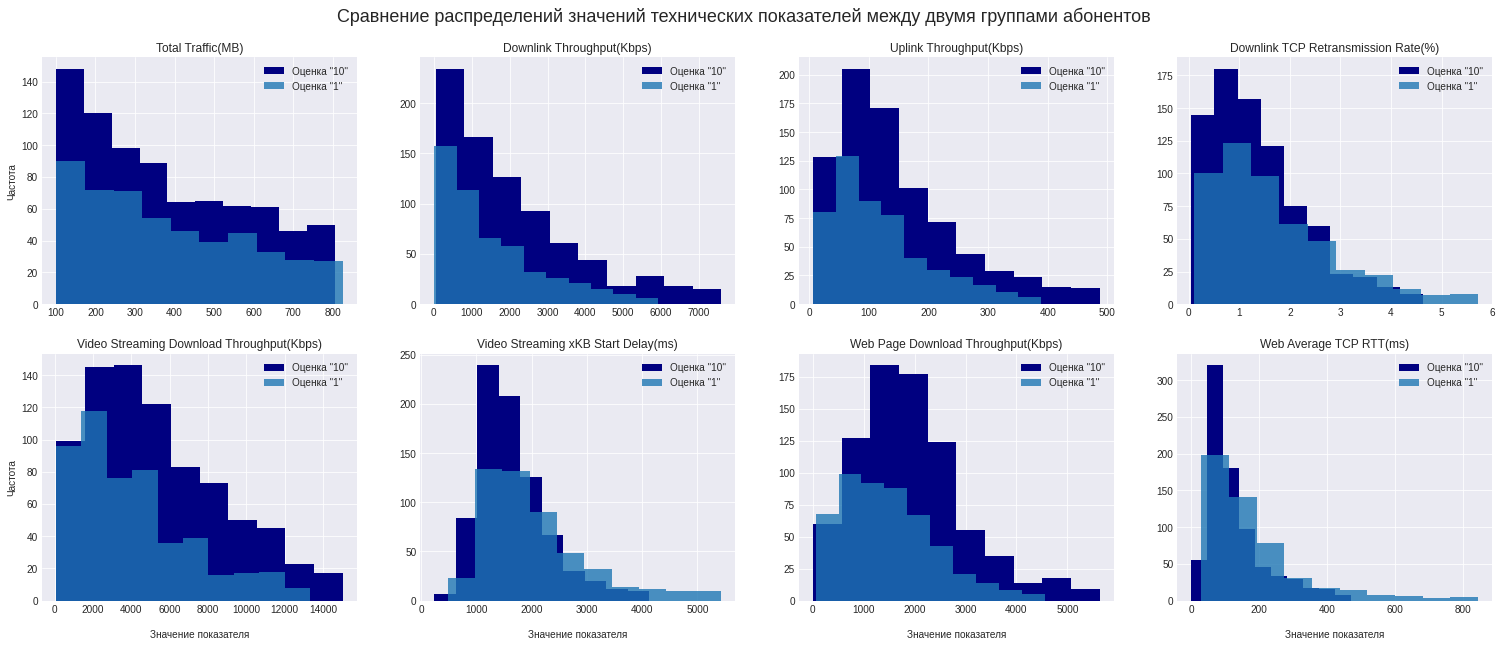

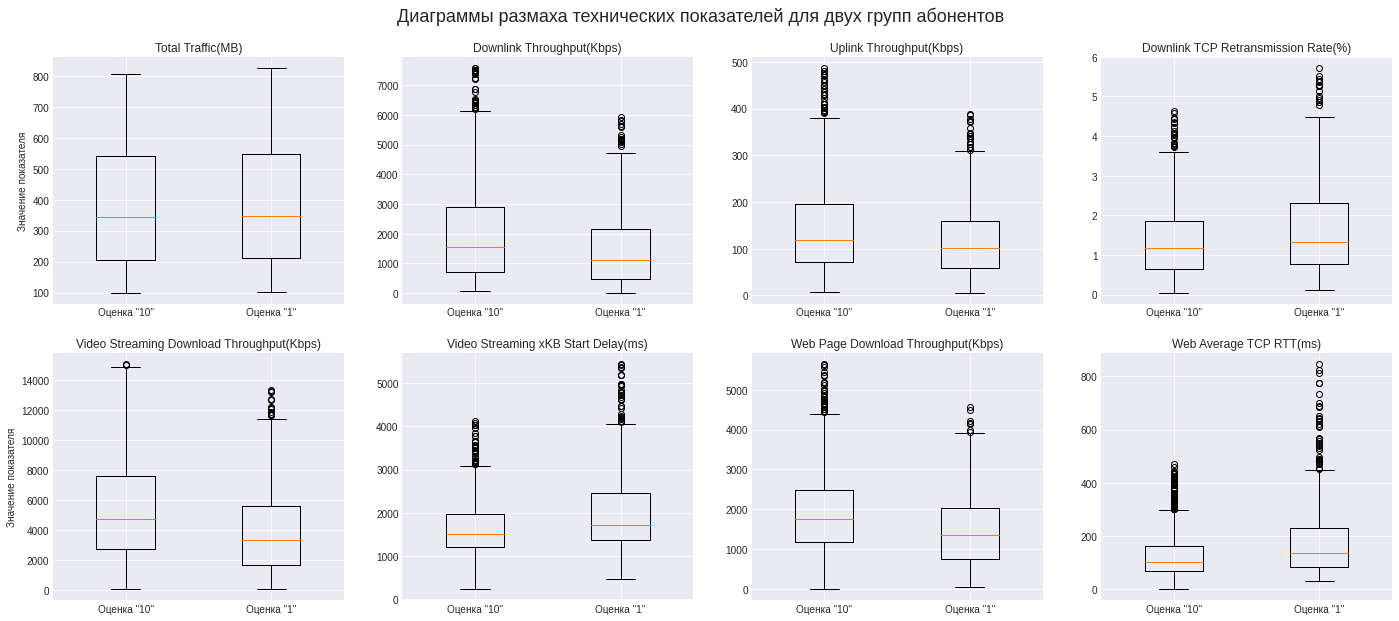

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (26, 10))
plt.suptitle('Сравнение распределений значений технических показателей между двумя группами абонентов', y = 0.95, fontsize = 18)
for i in range(2):
  for j in range(4):
    ax = axes[i][j]
    if i == 0:
      feature = best_ratings.columns[3:][j]
      values_best_score = best_ratings[(best_ratings[feature] <= upper_quantiles_best_score[j])][feature]
      values_worst_score = worst_ratings[worst_ratings[feature] <= upper_quantiles_worst_score[j]][feature]    
      ax.hist(values_best_score, color = 'navy', label = 'Оценка "10"')
      ax.hist(values_worst_score, alpha = 0.8, label = 'Оценка "1"')
      ax.set_title(feature)
      ax.legend()
      if j == 0:
        ax.set_ylabel('Частота')
    else:
      feature = best_ratings.columns[3:][j+4]     
      values_best_score = best_ratings[best_ratings[feature] <= upper_quantiles_best_score[j+4]][feature]
      values_worst_score = worst_ratings[worst_ratings[feature] <= upper_quantiles_worst_score[j+4]][feature]    
      ax.hist(values_best_score, color = 'navy', label = 'Оценка "10"')
      ax.hist(values_worst_score, alpha = 0.8, label = 'Оценка "1"')
      ax.set_title(feature)
      ax.set_xlabel('\nЗначение показателя')
      if j == 0:
        ax.set_ylabel('Частота')
      ax.legend()
plt.show()
print()
print()
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (24, 10))
plt.suptitle('Диаграммы размаха технических показателей для двух групп абонентов', y = 0.95, fontsize = 18)
for i in range(2):
  for j in range(4):
    ax = axes[i][j]
    if i == 0:
      feature = best_ratings.columns[3:][j]
      values_best_score = best_ratings[best_ratings[feature] <= upper_quantiles_best_score[j]][feature]
      values_worst_score = worst_ratings[worst_ratings[feature] <= upper_quantiles_worst_score[j]][feature]   
      ax.boxplot([values_best_score, values_worst_score], widths = 0.4, labels = ['Оценка "10"', 'Оценка "1"'])
      ax.set_title(feature)
      if j == 0:
        ax.set_ylabel('Значение показателя')
    else:
      feature = best_ratings.columns[3:][j+4]
      values_best_score = best_ratings[best_ratings[feature] <= upper_quantiles_best_score[j+4]][feature]
      values_worst_score = worst_ratings[worst_ratings[feature] <= upper_quantiles_worst_score[j+4]][feature]    
      ax.boxplot([values_best_score, values_worst_score], widths = 0.4, labels = ['Оценка "10"', 'Оценка "1"'])
      ax.set_title(feature)
      if j == 0:
        ax.set_ylabel('Значение показателя')

*Судя по графикам, можно выделить три группы технических показателей по степени различия:*
- *Наиболее явно видна разница по таким показателям как: "Video Streaming Download Throughput", "Video Streaming xKB Start Delay", "Web Page Download Throughput" и "Web Average TCP RTT";*
- *В меньшей степени различия наблюдаются среди: "Downlink Throughput",       "Uplink Throughput(Kbps)" и "Downlink TCP Retransmission Rate;*
- *Можно сказать, что по показателю "Total Traffic" практически нет разницы между двумя группами абонентов.*

*Ранее уже отмечалось, что значения измерены в разных масштабах и это может затруднить интерпретацию дальнейших наблюдений. Например, если нужно будет определить, значения какого из признаков имеют бОльшие различия между исследуемыми группами пользователей, удобнее и легче это будет сделать на данных, представленных в одном масштабе.*

***2. Следующим шагом проверим наличие разницы по техническим показателям с помощью перестановочных тестов. В качестве статистики для сравнения будет использовано медианное значение, а точнее, разница между медианными значениями показателя в зависимости от поставленной оценки.***

***При этом, полученные значения будут приведены к одному масштабу.***

In [ ]:
def permutation_test_visualization(dataset_1, dataset_2, features, title):
  """ 
  --------------Визуалиация результов перестановочного теста для каждого показателя.--------------

  Функция принимает на вход два датасета с информацией о технических показателях по абонентам.
  Датасеты соотвествуют поставленной оценки.
  К каждому из показателей, в цикле, применяется следующая последовательность действий:
  1. Фиксируетя разница медиан по показателю для двух датасетов.
  2. Значения показателя из каждого датасета объединяются в общий массив.
  3. Происходит случайная перетасовка данных.
  4. Из массива достаются выборки, соответствующие по размеру исследуемым группам.
  5. Повторно вычисляется разница медиан. Результат сохраняется в списке.
  6. Процедура повторяется n раз.
  7. На графике отображается распределение разниц и исходная разница медиан.

  * Для приведения данных к одному масштабу, полученную разницу медиан делим на м/к размах (5%-95%).
  """

  columns = features
  fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (24, 10))
  plt.suptitle(f'Результат перестановочного теста для абонентов, которые поставили оценку {title}', fontsize = 14, y = 0.95)
  for i in range(2):
    for j in range(4):
      ax = axes[i][j]
      if i == 0:
        values_best_score = dataset_1[columns[j]]
        values_worst_score = dataset_2[columns[j]]
        array_united = np.hstack([values_best_score, values_worst_score])
        #interquartile_range = np.percentile(array_united, 95) - np.percentile(array_united, 5)
        scope = array_united.max() - array_united.min()
        difference_of_averages = (values_best_score.median() - values_worst_score.median()) / scope #interquartile_range
        differences = []
        for iteration in range(1500):
          array_permutation = np.random.permutation(array_united)
          #interquartile_range = np.percentile(array_permutation, 95) - np.percentile(array_permutation, 5)
          scope = array_permutation.max() - array_permutation.min()
          group_1 = array_permutation[:values_best_score.shape[0]]
          group_2 = array_permutation[values_best_score.shape[0]:]
          differences.append((np.median(group_1) - np.median(group_2)) / scope) #interquartile_range)
        ax.hist(differences)
        ax.axvline(x = difference_of_averages, color = 'red', linestyle = '--')
        ax.set_title(columns[j]) 
        if j == 0:     
          ax.set_ylabel('Частота')
      else:
        values_best_score = dataset_1[columns[j+4]]
        values_worst_score = dataset_2[columns[j+4]]   
        array_united = np.hstack([values_best_score, values_worst_score])
        #interquartile_range = np.percentile(array_united, 95) - np.percentile(array_united, 5)
        scope = array_united.max() - array_united.min()
        difference_of_averages = (values_best_score.median() - values_worst_score.median()) / scope #interquartile_range
        differences = []
        for iteration in range(1500):
          array_permutation = np.random.permutation(array_united)
          #interquartile_range = np.percentile(array_permutation, 95) - np.percentile(array_permutation, 5)
          scope = array_permutation.max() - array_permutation.min()
          group_1 = array_permutation[:values_best_score.shape[0]]
          group_2 = array_permutation[values_best_score.shape[0]:]
          differences.append((np.median(group_1) - np.median(group_2)) / scope) #interquartile_range)
        ax.hist(differences)
        ax.axvline(x = difference_of_averages, color = 'red', linestyle = '--')
        ax.set_title(columns[j+4])      
        ax.set_xlabel('Полученная разница')
        if j == 0:          
          ax.set_ylabel('Частота')

def get_p_values(dataset_1, dataset_2, features):
  """ 
  ----------------------Расчет p-value на основе метода бутсрап.----------------------
  
  Функция принимает на вход два датасета с информацией о технических показателях по абонентам.
  Датасеты соотвествуют поставленной оценки.
  К каждому из показателей, в цикле, применяется следующая последовательность действий:
  1. Фиксируетя разница медиан по показателю для двух датасетов (двух групп пользователей).
  1. Из каждого датасета в случайном порядке извлекается 2/3 данных с возвратом.
  2. Повторно вычисляется разница медиан. Результат сохраняется в массиве.
  3. Процедура повторяется n раз.
  4. Вычисляется значение p-value.
  5. Результаты выводятся в таблице.
  """

  p_values = []
  n1 = int(dataset_1.shape[0] * 0.65)
  n2 = int(dataset_2.shape[0] * 0.65)
  differences = np.zeros((1, 1500)) 
  for column in features:
    value_1 = dataset_1[column].median()
    value_2 = dataset_2[column].median()
    diff = abs(value_1 - value_2)
    for i in range(0, 1500):
      s1 = random.choices(dataset_1[column].values, k = n1)
      s2 = random.choices(dataset_2[column].values, k = n2)
      p1 = np.median(s1)
      p2 = np.median(s2)
      differences[0][i] = abs(p1 - p2)  
    p_value = ((differences - np.median(differences)) >= diff).sum() / 1500
    p_values.append([column, round(p_value, 4)])
  p_values_df = pd.DataFrame(p_values, columns = ['Показатель', f'p-value']).sort_values(f'p-value')
  return p_values_df

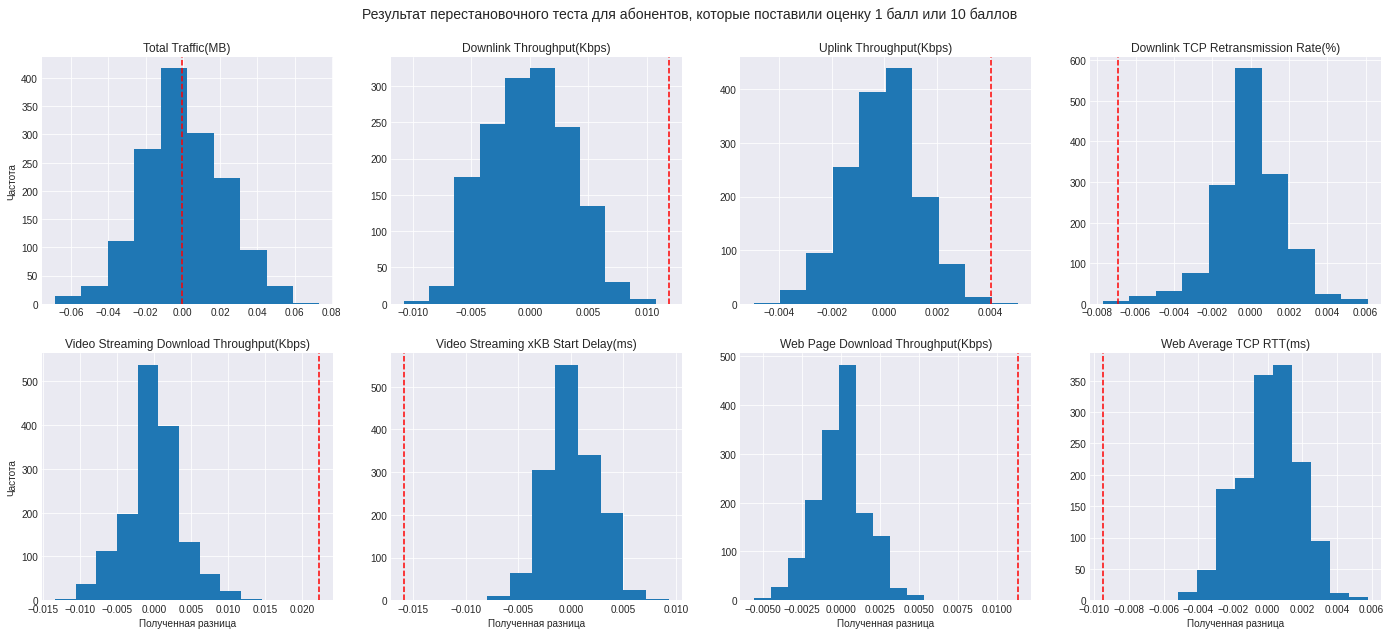

In [ ]:
permutation_test_visualization(best_ratings, worst_ratings, best_ratings.columns[3:], '1 балл или 10 баллов')

*Результаты перестановочного теста подтверждают ранее сделанные выводы не только о том, что различия между характеристиками существуют, но и о степени данных различий. Наиболее сильная разница наблюдается по таким показателям как:*
* *Video Streaming Download*
* *Video Streaming Start Delay*
* *Web Page Download*
* *Web Average TCP RTT*

***3. Так как для визуализации результатов перестановочного теста использовался метод, позволяющий привести данные к одному масштабу, значения могли в той или иной степени исказиться, для более точного анализа, необходимо воспользоваться сравнением p-значений.***

In [ ]:
get_p_values(best_ratings, worst_ratings, megafon.columns[3:])

,Показатель,p-value
1,Downlink Throughput(Kbps),0.0000
4,Video Streaming Download Throughput(Kbps),0.0000
6,Web Page Download Throughput(Kbps),0.0000
5,Video Streaming xKB Start Delay(ms),0.0013
7,Web Average TCP RTT(ms),0.0020
3,Downlink TCP Retransmission Rate(%),0.0213
2,Uplink Throughput(Kbps),0.0260
0,Total Traffic(MB),0.4960


*В данном случае, сделанные ранее выводы не только подтвердились, но и в список показателей со статистически значимыми различиями между двумя группами абонентов необходимо будет добавить "Downlink Throughput", "Uplink Throughput", "Downlink TCP Retransmission Rate".*

***4. В завершении данной части работы, необходимо проверить, насколько выводы, сделанные относительно различий между пользователями, которые поставили крайние оценки (1 или 10 баллов), могут быть обобщены на абонентов, которые поставили положительные оценки (9 и более баллов) и негативные оценки (менее 9 баллов).***

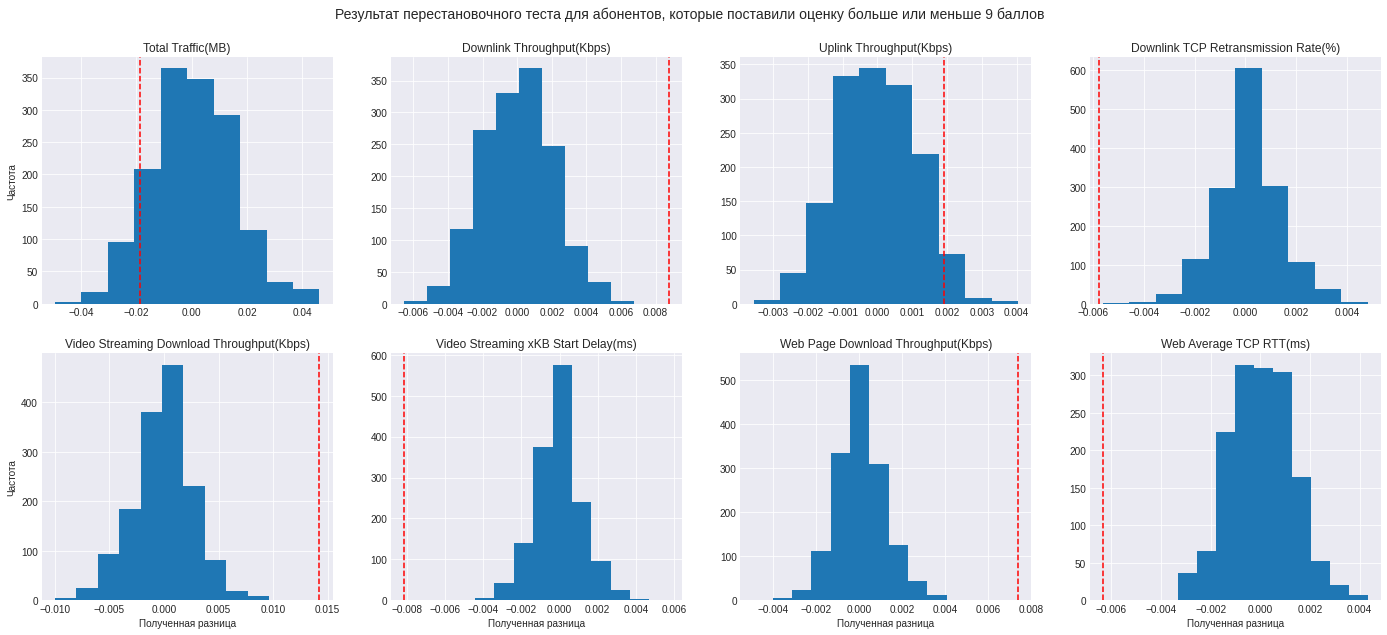

In [ ]:
positive_scores = megafon.query('Q1>=9')
negative_scores = megafon.query('Q1<9')
permutation_test_visualization(positive_scores, negative_scores, positive_scores.columns[3:], 'больше или меньше 9 баллов')

In [ ]:
get_p_values(positive_scores, negative_scores, megafon.columns[3:])

,Показатель,p-value
5,Video Streaming xKB Start Delay(ms),0.0000
6,Web Page Download Throughput(Kbps),0.0000
7,Web Average TCP RTT(ms),0.0000
1,Downlink Throughput(Kbps),0.0007
3,Downlink TCP Retransmission Rate(%),0.0007
4,Video Streaming Download Throughput(Kbps),0.0007
2,Uplink Throughput(Kbps),0.1073
0,Total Traffic(MB),0.1653


*Можно сказать, что выводы сделанные для пользователей, которые поставили крайние оценки, можно обобщить и на всех абонентов. Помимо этого, можно удалить из списка значимых технических показателей "Uplink Throughput".*

**По результатам проведенного анализа, можно частично подтвердить гипотезу и полный вывод будет звучать следующим образом:**

***Среди пользователей, которые поставили оценку 1 балл и 10 баллов, есть статистически значимые различия по техическим показателям.***\
***Данные выводы можно обобщить и на остальных пользователей.***\
***Такие различия не удалось установить по таким показателям как: "Total Traffic", "Uplink Throughput".***\
***Предположение о том, что на данном этапе можно будет выделить несколько основных технических характеристик не подтвердилось. По результатам расчета p-value, в списке оказалось 6 значимых показателей.***



## **Уровень влияния выбранных показателей.**

В предыдущем разделе был получен подтвержденный вывод о том, что есть различия между пользователями, которые поставили диаметрально крайние оценки, при этом удалось выявить два признака, которые не оказали влияния на ответы клиентов.

С другой стороны, остается 6 технических характеристик, которые влияют на оценки абонентов, но степень влияния достоверно не установлена, есть только не подтвержденные предположения.

Таким образом, следующим шагом будет попытка выделить из оставшихся характеристик те признаки, изменение которых в большей степени повлияет на уровень удовлетворенности абонентов.



***1. На первоначальном этапе, предлагается визуально оценить динамику изменения доверительных интервалов медианного значения выбранных технических показателей в соответствии с поставленными оценками.***

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
def median_confidence_interval(array):
  mad = np.median(abs(array - np.median(array)))
  med_error = mad / np.sqrt(array.shape[0])
  st_int = st.t.interval(0.9, len(array)-1, loc = np.median(array), scale = med_error)
  return st_int

def get_intervals(column):
  """
  Функция принимает на вход технический показатель.
  Возвращает список списков, формата [[], []]. 
  Индекс основного списка соответсвует значениям нижней или верхней границе интервала.
  Индекс вложенного списка соотвествует оценке от 1 до 10.  
  """
  intervals = [[], []]
  for score in range(1, 11):
    column_value = megafon.query(f"Q1=={score}")[column].values
    st_int = median_confidence_interval(column_value)
    intervals[0].append(round(st_int[0], 2))
    intervals[1].append(round(st_int[1], 2))
  return intervals

In [ ]:
# Вычисляем интервалы для каждого показателя.
video_download_intervals = get_intervals('Video Streaming Download Throughput(Kbps)')
video_delay_intervals = get_intervals('Video Streaming xKB Start Delay(ms)')
page_download_intervals = get_intervals('Web Page Download Throughput(Kbps)')
average_tcprtt_intervals = get_intervals('Web Average TCP RTT(ms)')
downlink_throughput_intervals = get_intervals('Downlink Throughput(Kbps)')
retransmission_rate_intervals = get_intervals('Downlink TCP Retransmission Rate(%)')


**1.1. Визуализация результатов.**

In [ ]:
paper = go.Figure()
paper.add_trace(go.Scatter(x = list(range(1, 11)), y = video_download_intervals[0], name = 'Нижняя граница интервала',
                        hovertext = video_download_intervals[0], hoverinfo = 'text'))
paper.add_trace(go.Scatter(x = list(range(1, 11)), y = video_download_intervals[1], fill = 'tonexty', name = 'Верхняя граница интервала',
                        hovertext = video_download_intervals[1], hoverinfo = 'text'))

paper.add_trace(go.Scatter(x = list(range(1, 11)), y = video_delay_intervals[0], name = 'Нижняя граница интервала',
                        hovertext = video_delay_intervals[0], hoverinfo = 'text'))
paper.add_trace(go.Scatter(x = list(range(1, 11)), y = video_delay_intervals[1], fill = 'tonexty', name = 'Верхняя граница интервала',
                        hovertext = video_delay_intervals[1], hoverinfo = 'text'))

paper.add_trace(go.Scatter(x = list(range(1, 11)), y = page_download_intervals[0], name = 'Нижняя граница интервала',
                        hovertext = page_download_intervals[0], hoverinfo = 'text'))
paper.add_trace(go.Scatter(x = list(range(1, 11)), y = page_download_intervals[1], fill = 'tonexty', name = 'Верхняя граница интервала',
                        hovertext = page_download_intervals[1], hoverinfo = 'text'))

paper.add_trace(go.Scatter(x = list(range(1, 11)), y = average_tcprtt_intervals[0], name = 'Нижняя граница интервала',
                        hovertext = average_tcprtt_intervals[0], hoverinfo = 'text'))
paper.add_trace(go.Scatter(x = list(range(1, 11)), y = average_tcprtt_intervals[1], fill = 'tonexty', name = 'Верхняя граница интервала',
                        hovertext = average_tcprtt_intervals[1], hoverinfo = 'text'))

paper.add_trace(go.Scatter(x = list(range(1, 11)), y = downlink_throughput_intervals[0], name = 'Нижняя граница интервала',
                        hovertext = downlink_throughput_intervals[0], hoverinfo = 'text'))
paper.add_trace(go.Scatter(x = list(range(1, 11)), y = downlink_throughput_intervals[1], fill = 'tonexty', name = 'Верхняя граница интервала',
                        hovertext = downlink_throughput_intervals[1], hoverinfo = 'text'))

paper.add_trace(go.Scatter(x = list(range(1, 11)), y = retransmission_rate_intervals[0], name = 'Нижняя граница интервала',
                        hovertext = retransmission_rate_intervals[0], hoverinfo = 'text'))
paper.add_trace(go.Scatter(x = list(range(1, 11)), y = retransmission_rate_intervals[1], fill = 'tonexty', name = 'Верхняя граница интервала',
                        hovertext = retransmission_rate_intervals[1], hoverinfo = 'text'))

paper.update_layout(xaxis_title = 'Поставленная оценка', yaxis_title = 'Значение технического показателя', hovermode= 'x',
                    xaxis = dict(tickmode = 'linear', tick0 = 1, dtick = 1), autosize = False, width = 1550, height = 550,
                    title = 'Динамика изменения доверительных интервалов для показателя "Video Streaming Download Throughput"')

mysteps = [{'method': 'update', 'args': [{'visible': [True if i in [0, 1] else False for i in range(12)]},
           {'title.text' : 'Динамика изменения доверительных интервалов для показателя "Video Streaming Download Throughput"'}],
            'label': 'Video Streaming Download'},
           {'method': 'update', 'args': [{'visible': [True if i in [2, 3] else False for i in range(12)]},
           {'title.text' : 'Динамика изменения доверительных интервалов для показателя "Video Streaming xKB Start Delay"'}],
            'label': 'Video Streaming Start Delay'},
           {'method': 'update', 'args': [{'visible': [True if i in [4, 5] else False for i in range(12)]},
           {'title.text' : 'Динамика изменения доверительных интервалов для показателя "Web Page Download Throughput"'}],
            'label': 'Web Page Download'},
           {'method': 'update', 'args': [{'visible': [True if i in [6, 7] else False for i in range(12)]},
           {'title.text' : 'Динамика изменения доверительных интервалов для показателя "Web Average TCP RTT"'}],
            'label': 'Web Average TCP'},
           {'method': 'update', 'args': [{'visible': [True if i in [8, 9] else False for i in range(12)]},
           {'title.text' : 'Динамика изменения доверительных интервалов для показателя "Downlink Throughput"'}],
            'label': 'Downlink Throughput'},
           {'method': 'update', 'args': [{'visible': [True if i in [10, 11] else False for i in range(12)]},
           {'title.text' : 'Динамика изменения доверительных интервалов для показателя "Downlink Retransmission Rate"'}],
            'label': 'Downlink Retransmission Rate'}]

paper.update_layout(sliders=[dict(steps=mysteps)])
for i in range(2, 12):
  paper.data[i].visible = False

paper.show()

*После визуальной оценки динамики изменения доверительных интервалов можно сделать следующие выводы:*

1. *Можно сказать, что, в целом, значения выбранных технических показателей имеют линейную зависимость от поставленной оценки, то есть, оценки пользователей логичны. Исключением может быть "Web Average TCP", динамика изменения которого достаточно скачкообразна.*
2. *У некоторых показателей (например, 'Video Streaming Download', 'Web Page Download', 'Downlink Throughput') наблюдается одникаково низкий уровень качества среди тех пользователей, которые поставили оценку до 5 баллов. То есть, улучшение показателя на определенное значение, затронет уже больше групп клиентов.*

***1.2. С помощью критерия Краскела можно проверить наблюдения о равенстве значений технических показателей, о котором говорилось выше (оценка менее 5 баллов). Данный критерий сравнивает медианы разных групп и в данном случае его применение будет наиболее подходящим.***

In [ ]:
columns_for_comparison = ['Video Streaming Download Throughput(Kbps)', 'Video Streaming xKB Start Delay(ms)', 'Web Page Download Throughput(Kbps)', 
                          'Web Average TCP RTT(ms)', 'Downlink Throughput(Kbps)', 'Downlink TCP Retransmission Rate(%)']

In [ ]:
kruskal_values = []

for column in columns_for_comparison:
  p_value = round(st.kruskal(megafon.query('Q1==1')[column], megafon.query('Q1==2')[column],
                             megafon.query('Q1==3')[column], megafon.query('Q1==4')[column], 
                             megafon.query('Q1==5')[column])[1], 4)
  
  kruskal_values.append([column, p_value])

pd.DataFrame(kruskal_values, columns = ['Признак', 'p-value']).sort_values('p-value', ascending = False)

,Признак,p-value
4,Downlink Throughput(Kbps),0.2296
5,Downlink TCP Retransmission Rate(%),0.1482
0,Video Streaming Download Throughput(Kbps),0.1302
1,Video Streaming xKB Start Delay(ms),0.0651
2,Web Page Download Throughput(Kbps),0.0588
3,Web Average TCP RTT(ms),0.0024


***2. На данный момент нет понимания по поводу того, какой из технических показателей в большей степени повлиял на оценку пользователя. Для решения этой задачи можно поступить следующим образом:***
 - ***принять за "эталонное значение" такое значение технического показателя, которое соответствовало оценке в 10 баллов.***
 - ***рассчитать отклонение от "эталонного значения" для каждой оценки. Отклонением будет считаться разница в процентах.***
 - ***выполнить такие расчеты для всех показателей и визуализировать полученные результаты: по оси X будут отложены оценки от 1 до 8, по оси Y полученные отклонения.***
 - ***''вклад'' показателя будет оцениваться по величине отклонения.***

In [ ]:
deviations = []
for i, score in enumerate(range(1, 9)):
  deviations.append([score])
  for column in columns_for_comparison:
    reference_value = megafon.query('Q1>=9')[column].median()
    compared_value = megafon.query(f'Q1=={score}')[column].median()
    percentage_difference = round(abs(reference_value - compared_value) / reference_value * 100, 2)
    deviations[i].append(percentage_difference)

dev_df = pd.DataFrame(deviations, columns = ['Q1'] + columns_for_comparison)
dev_df = dev_df.merge(scores_number, on = 'Q1', how = 'left')

fig = px.scatter(data_frame = dev_df, x = 'Q1', y = dev_df.columns[1:-1], size = 'Всего оценок')
fig.update_traces(mode = 'markers+lines', hovertemplate = 'Отклонение: -%{y}%<br>' + '%{text}' + '<extra></extra>',
                  text = ['Количество оценок: {}'.format(i) for i in dev_df['Всего оценок']])
fig.update_layout(title = 'Отклонение от медианного значения зафиксированного при положительной оценке',
                  yaxis_title = 'Отклонение (%)', xaxis_title = 'Оценка', legend = dict(title = 'Технические показатели'),
                  autosize = False, width = 1500, height = 600)
fig.show()

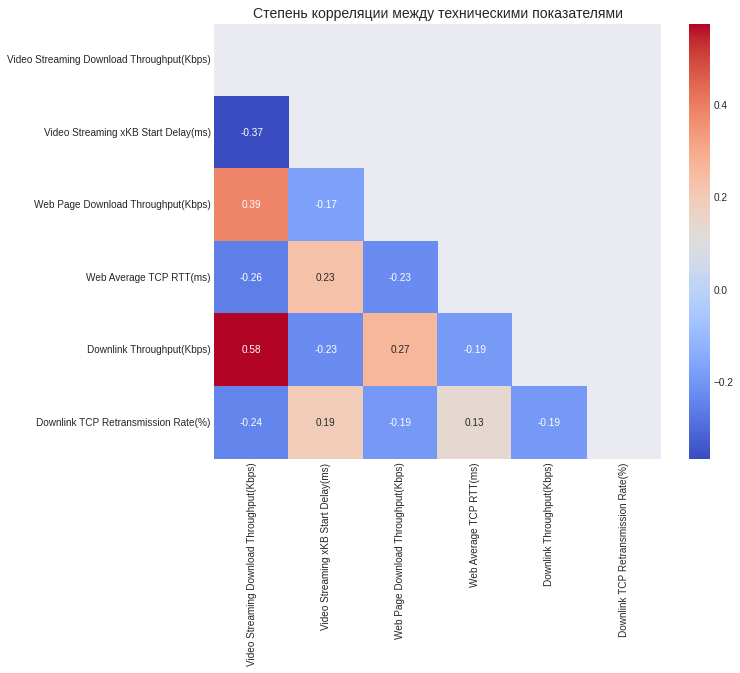

In [ ]:
plt.figure(figsize = (10, 8))
all_features = megafon[columns_for_comparison]
matrix = np.triu(all_features.corr())
sns.heatmap(all_features.corr(), annot = True, mask = matrix, cmap = 'coolwarm')
plt.title('Степень корреляции между техническими показателями', fontsize = 14)
plt.show()

**По результатам наблюдений, наиболее логичным кажется вывод о том, что** ***такие показатели, как 'Video Streaming Download', 'Downlink Throughput' и 'Web Average' оказали наибольшее влияние на негативные оценки и их необходимо улучшать в первую очередь:***
* **По этим показателям наблюдается наибольшее отклонение от "эталонного" значения, в особенности, для оценок с наибольшим количеством пользователей (1, 3, 5);**
* **Явно выделяются общие группы клиентов с одинаково низким уровнем качества данных показателей;**
* **Выявлена положительная корреляция между 'Video Streaming Download' и 'Downlink Throughput', то есть, в последствии, можно будет выбрать один из этих признаков.**    


## **Ответы на второй вопрос и гипотеза для итогового отбора показателей.**

*На текущем этапе уже определены три основных технических показателя, которые могут оказать наибольшее влияние на уровень удовлетворенности качеством предоставляемых услуг.*

*Используя ответы на вторую часть опроса, можно попытаться убрать еще один из показателей. Так как, в предыдущем разделе была обнаружена корреляция между  'Video Streaming Download' и 'Downlink Throughput', то следующая гипотеза будет направлена именно на выбор из этих характеристик.*

**В качестве ответа на второй вопрос из двух пунктов: "медленный мобильный интернет" и "медленная загрузка видео" - пользователи чаще выбирают именно "медленный мобильный интернет".**

*Результат подтверждения данной гипотезы поможет из двух показателей 'Video Streaming Download' и 'Downlink Throughput' оставить один.*

Расшифровка ответов:
1. Недозвоны / обрывы при звонках
2. Время ожидания гудков при звонке
3. Плохое качество связи в зданиях
4. Медленный мобильный интернет
5. Медленная загрузка видео
6. Затрудняюсь ответить
7. Свой вариант

In [ ]:
# Какие ответы были получены на второй вопрос.
display(megafon['Q2'].value_counts().head(5))
print()
print('*'*40)
print()
display(megafon['Q2'].value_counts().tail(5))

3       190
4       170
1       168
1, 3    121
3, 4     85
Name: Q2, dtype: int64


****************************************



2, 5             1
1, 2, 3, 4, 7    1
10               1
0                1
1, 2, 3, 7       1
Name: Q2, dtype: int64

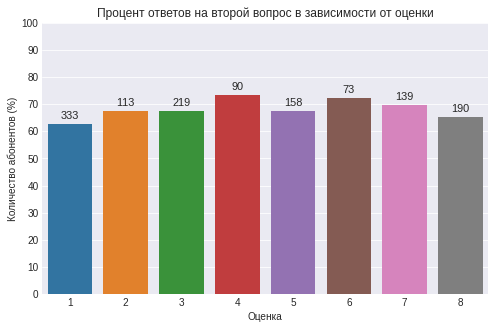

In [ ]:
megafon['Q2'].fillna('Нет ответа', inplace = True)
have_answer = [megafon.query(f"Q1=={i}&Q2!='Нет ответа'").shape[0] for i in range(1, 11)]
scores_number['% ответов на 2-й вопрос'] = [round(have_answer[i]/scores_number['Всего оценок'][i]*100, 2) for i in range(10)]

plt.figure(figsize = (8, 5))
sns.barplot(x = 'Q1', y = '% ответов на 2-й вопрос', data = scores_number.query('Q1<9'))
for i in range(8):
  value = scores_number['% ответов на 2-й вопрос']
  plt.text(i, value[i]+2, f'{have_answer[i]}', fontsize = 11, horizontalalignment = 'center')
plt.title('Процент ответов на второй вопрос в зависимости от оценки')
plt.xlabel('Оценка')
plt.ylabel('Количество абонентов (%)')
plt.yticks(range(0, 110, 10))
plt.show()

*Судя по графику, более 70% пользователей ответили и на второй вопрос. То есть, можно сказать, что результаты могут быть достоверными.*

**1. В ответах на второй вопрос могли содержаться несколько разных вариантов. Но если пользователь выбирал только один из предложенных вариантов, это может свидетельствовать о высоком уровне влияния указанной причины.**

In [ ]:
answers = megafon.query("Q1<9&Q2!='Нет ответа'")[['Q1', 'Q2']]
answers['Q2'] = answers['Q2'].apply(lambda x: x.split(','))

# Данный столбец содержит информацию о количестве выбранных пунктов.
answers['Выбрано пунктов'] = answers['Q2'].apply(lambda x: len(x))

# "Распаковываем" ответы с множественным выбором по строкам с помощью pd.explode.
answers = answers.explode('Q2')
answers['Q2'] = answers['Q2'].astype(int)

# Датасет, содержащий только ответы с одним вариантом.
only_choice = answers[answers['Выбрано пунктов'] == 1].groupby('Q1')['Q2'].count().values
only_choice_df = answers[answers['Выбрано пунктов'] == 1].groupby('Q2', as_index = False)['Q1'].count()\
                                                         .rename(columns = {'Q2': 'Пункт', 'Q1': 'Количество'})                                                    
only_choice_df = only_choice_df.query('Пункт>0&Пункт<8')
only_choice_df['Пункт'] = only_choice_df['Пункт'].astype(str)

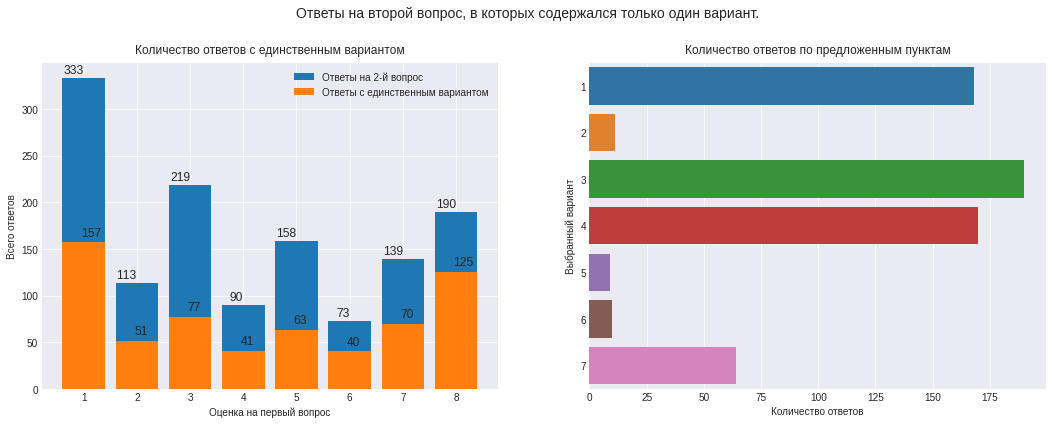


Процент пользователей, которые выбрали только один вариант ответа на второй вопрос: 47.45%


In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
plt.suptitle('Ответы на второй вопрос, в которых содержался только один вариант.', y = 1.01, fontsize = 14)
axes[0].bar(list(range(1, 9)), have_answer[:-2], label = 'Ответы на 2-й вопрос')
for i in range(8):
  axes[0].text(i+1, have_answer[i]+5, f'{have_answer[i]}', fontsize = 12, horizontalalignment = 'right')
axes[0].bar(list(range(1, 9)), only_choice, label = 'Ответы с единственным вариантом')
for i in range(8):
  axes[0].text(i+0.95, only_choice[i]+7, f'{only_choice[i]}', fontsize = 12, horizontalalignment = 'left')
axes[0].legend()
axes[0].set_title('Количество ответов с единственным вариантом', y = 1.01)
axes[0].set_ylabel('Всего ответов')
axes[0].set_xlabel('Оценка на первый вопрос')

sns.barplot(x = 'Количество', y = 'Пункт', data = only_choice_df, ax = axes[1])
axes[1].set_title('Количество ответов по предложенным пунктам', y = 1.01)
axes[1].set_ylabel('Выбранный вариант')
axes[1].set_xlabel('Количество ответов')
plt.show()
print()
print(f'Процент пользователей, которые выбрали только один вариант ответа на второй вопрос: {round(sum(only_choice) * 100 / sum(have_answer), 2)}%')

***В случае, когда рассматриваем ответы на второй вопрос с единственным вариантом, пункт "Медленный мобильный интернет" является одним из самых популярных, в то время, как пункт "Медленная загрузка видео", наоборот, встречается достаточно редко.***

**2. Следующим шагом следует подсчитать общее количество случаев, когда пользователи выбирали тот или другой пункт.**

In [ ]:
selection_of_items = answers.groupby('Q2', as_index = False)['Q1'].count().sort_values('Q2')\
                            .rename(columns = {'Q1': 'count'})
selection_of_items = selection_of_items.query('Q2>0&Q2<8')
selection_of_items['Q2'] = selection_of_items['Q2'].astype(str)

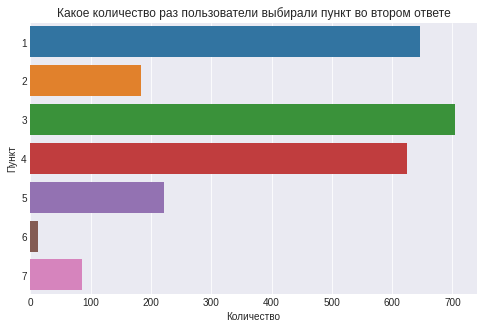

In [ ]:
plt.figure(figsize = (8, 5))
sns.barplot(x = 'count', y = 'Q2', data = selection_of_items)
plt.title('Какое количество раз пользователи выбирали пункт во втором ответе')
plt.xlabel('Количество')
plt.ylabel('Пункт')
plt.show()

**Если считать все ответы пользователей на второй вопрос, то пункт "Медленный мобильный интернет" выбирали в три раза чаще, чем пункт "Медленная загрузка видео".**

**По результатам проведенного анализа, можно подтвердить гипотезу и итоговый перечень технических показателей, который рекомендуется улучшать в первую очередь - 'Downlink Throughput' и 'Web Average TCP RTT'**

## **Итог проведенного анализа.**

Результаты проведенной работы по подтверждению поставленных гипотез и исследованию данных можно кратко охаректирезовать следующим образом:

1. Во-первых, установлены статистические значимые различия в значениях технических показателей между пользователями, поставившими положительные и негативные оценки.
2. На основании визуализации сделан вывод о том, что наблюдается линейная зависимость между качеством показателей и поставленной оценкой. 
3. Выделены три основные технические показателя, которые в наибольшей степени повлияли на выбор абонентом итоговой оценки - 'Downlink Throughput', 'Web Average TCP RTT', 'Video Streaming Download'.
4. При момощи критерия Краскела-Уоллиса подтвержден тот факт, что пользователи, поставившие оценку ниже 5, характеризуются одинаково низкими показателями качества 'Downlink Throughput' и 'Video Streaming Download'.
5. На основании корреляции между 'Downlink Throughput' и 'Video Streaming Download', а также, используя информацию, содержащуюся во вторых ответах, из этих двух признаков оставлен 'Downlink Throughput'.
6. Таким образом, цель данной работы выполнена. В качестве основных характеристик, которые в первую очередь требуют улучшения качества выделены 'Downlink Throughput' и 'Web Average TCP RTT'.